# Make a character network from a text


In [1]:
import nbtext as nb
from nbtext import Corpus
%matplotlib inline

In [73]:
def check_navn(navn, limit=2, remove='Ja Nei Unnskyld Ikke Ah Hmm'.split()):
    """Removes all items in navn with frequency below limit and words in all case as well as all words in list 'remove'"""
    r = {x:navn[x] for x in navn if navn[x] > limit and x.upper() != x and not x in remove}
    return r

def check_edges(G, weight=1):
    import networkx as nx
    
    return nx.Graph([edge for edge in G.edges(data=True) if edge[2]['weight'] >= weight])


# Select a list of books

Add metadata in order to select a book.


In [52]:
bøker = nb.get_urn({'title':'krig%', 'author':"tols%", 'trans':'', 'year':1800, 'next':250, 'limit':130})

bøker

[[2007041101090, 'Tolstoj, L.N.', 'Krig og fred', 1962],
 [2008110400150, 'Tolstoj, L.N.', 'Krig og fred', 2001],
 [2012011008041, 'Tolstoj, L.N.', 'Krig og fred', 1951],
 [2015110507062, 'Tolstoj, L.N.', 'Krig og fred', 1928],
 [2014100308012, 'Tolstoj, L.N.', 'Krig og fred', 1929],
 [2011061508081, 'Tolstoj, L.N.', 'Krig og fred', 2008],
 [2007041001053, 'Tolstoj, L.N.', 'Krig og fred', 1962],
 [2011063022003, 'Tolstoj, L.N.', 'Krig og fred', 1967],
 [2007050801009, 'Tolstoj, L.N.', 'Krig og fred', 1968],
 [2008011501085, 'Tolstoj, L.N.', 'Krig og fred', 1993],
 [2014101408145, 'Tolstoj, L.N.', 'Krig og fred', 1929],
 [2011063022002, 'Tolstoj, L.N.', 'Krig og fred', 1967],
 [2011081020006, 'Tolstoj, L.N.', 'Krig og fred', 1968],
 [2015091406029, 'Tolstoj, L.N.', 'Krig og fred', 1929],
 [2008102204034, 'Tolstoj, L.N.', 'Krig og fred', 2000],
 [2007111900105, 'Tolstoj, L.N.', 'Krig og fred', 1993],
 [2008042400005, 'Tolstoj, L.N.', 'Krig og fred', 1951],
 [2007050800051, 'Tolstoj, L.N.

### Assign a select book to variable 'book'

In [105]:
book = [2008101004071, 'Tolstoj, L.N.', 'Krig og fred', 2000]

Compute the candidates for characters - anything starting with a capital letter that could be a person name or place name. Print the topmost elements.

In [106]:
book_names_raw = nb.navn(book)
print('Number of objects === ', len(list(book_names_raw)), '\nSome examples ======= ', list(book_names_raw)[:20])

Number of objects ===  287 
Some examples =======  ['Achrosimov', 'Aleksander', 'Aleksanders', 'Alfons', 'Aline', 'Allmektige', 'Alpatytsj', 'Amélie', 'Anatole', 'Andrei', 'Andreievitsj', 'Andreis', 'Andrejevitsj', 'Andriusja', 'André', 'Anna', 'Annette', 'Antikrist', 'Apraksin', 'Apraksins']


### Edit names, remove some words

Rerun from here and change parameters

In [107]:
book_names = check_navn(book_names_raw, 20)
print([x for x in book_names])

['Anatole', 'Andrei', 'Anna', 'Bagration', 'Berg', 'Bilibin', 'Bolkonskij', 'Boris', 'Bourienne', 'Buonaparte', 'Dem', 'Denisov', 'Deres', 'Dmitrievna', 'Dolochov', 'Gud', 'Helene', 'Hippolyte', 'Kuragin', 'Kutuzov', 'Liza', 'Maria', 'Michailovna', 'Moskva', 'Napoleon', 'Natasja', 'Nesvitskij', 'Nikolai', 'Nå', 'Pavlovna', 'Petersburg', 'Pierre', 'Pierres', 'Rostov', 'Sonja', 'Tusjin', 'Vasilij', 'Vera', 'Wien', 'Zherkov']


## Create the network

In [108]:
network_raw = nb.make_network(book, book_names)

Remove edges with a weight (usually number of connections) less than weight.

In [116]:
network = check_edges(network_raw, weight=5)

In [117]:
nb.central_betweenness_characters(network)

[('Andrei', 0.32264971561827954),
 ('Pierre', 0.15804751318376117),
 ('Boris', 0.08266938343522992),
 ('Dem', 0.07242797103791576),
 ('Anna', 0.0601972869627449),
 ('Maria', 0.039680942296226644),
 ('Vasilij', 0.036547257853082556),
 ('Deres', 0.0318131578901687),
 ('Rostov', 0.02638812423065566),
 ('Kutuzov', 0.024749288262217402)]

True

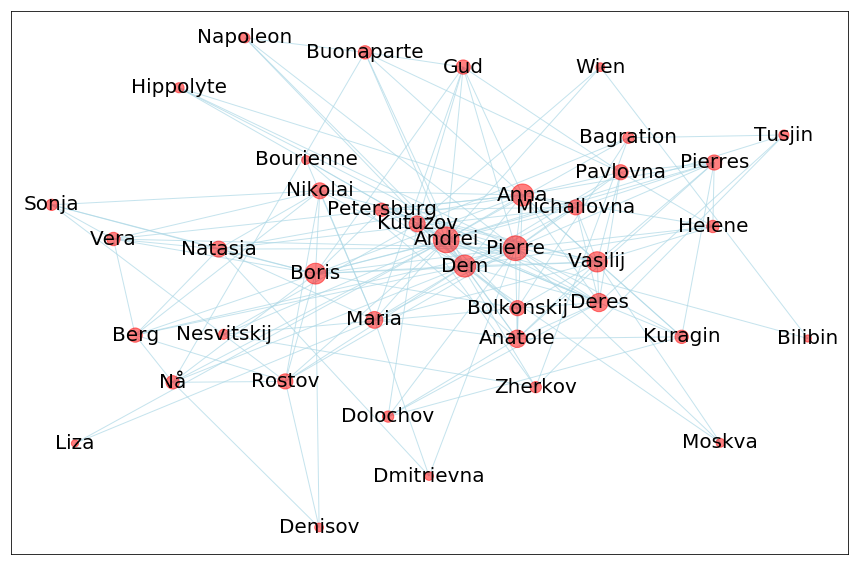

In [118]:
nb.draw_graph_centrality(network, k=2.5)